In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

In [3]:
aws = pd.read_csv('aws.csv', sep=',')
aws['cloud'] = 'aws'

In [4]:
aws.head()

,type,cores,ram,nets,ipsPerNet,lbs,lbsSize,nbsMbs,netMbs,cloud
0,t2.nano,1,0.5,2,2,NaN,NaN,0,Low,aws
1,t2.micro,1,1.0,2,2,NaN,NaN,0,Low to Moderate,aws
2,t2.small,1,2.0,2,4,NaN,NaN,0,Low to Moderate,aws
3,t2.medium,2,4.0,3,6,NaN,NaN,0,Low to Moderate,aws
4,t2.large,2,8.0,3,12,NaN,NaN,0,Low to Moderate,aws


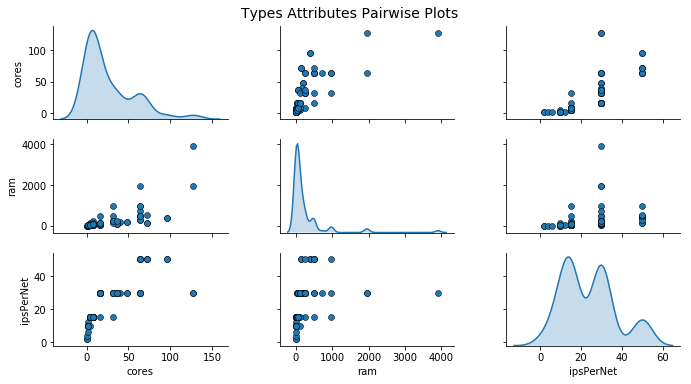

In [7]:
cols = ['cores', 'ram', 'ipsPerNet']
pp = sns.pairplot(aws[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Types Attributes Pairwise Plots', fontsize=14)